In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Suraj Jagtap\Desktop\Documents\Project\Project data\Capgemini_Employee_Reviews_from_AmbitionBox.csv", encoding='latin1')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Suraj Jagtap\\Desktop\\Cpgemini.csv'

## Balancing Dataset  by using Over sampling

In [14]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
df = pd.read_csv(r"C:\Users\Suraj Jagtap\Desktop\Cpgemini.csv", encoding='latin1')

# Define a function to map overall ratings to sentiment categories
def map_to_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the mapping function to create the new "Sentiment" column
df['Sentiment'] = df['Overall_rating'].apply(map_to_sentiment)

# Define features and target variable
X = df[['work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']]
y = df['Sentiment']

# Initialize the RandomOverSampler with a custom sampling strategy
sampling_strategy = {'Negative': 5512, 'Neutral': 5683}  # Increase count of negative and neutral
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Perform oversampling
X_over, y_over = ros.fit_resample(X, y)

# Create a new DataFrame with balanced data
df_balanced = pd.DataFrame(X_over, columns=X.columns)
df_balanced['Sentiment'] = y_over

# Print the balanced sentiment distribution
print("Balanced Sentiment Distribution:")
print(df_balanced['Sentiment'].value_counts())



Balanced Sentiment Distribution:
Sentiment
Positive    15059
Neutral      5683
Negative     5512
Name: count, dtype: int64


### Piechart of Dataset:

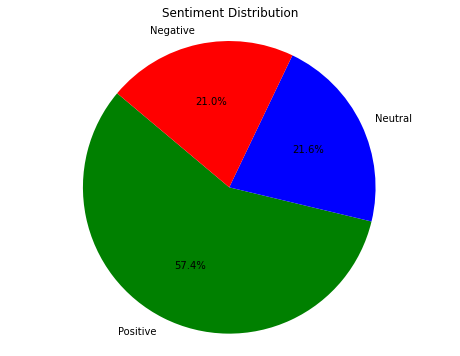

In [18]:
import matplotlib.pyplot as plt

# Calculate the sentiment distribution
sentiment_distribution = df_balanced['Sentiment'].value_counts()

# Define colors for each sentiment category
colors = {'Positive': 'green', 'Neutral': 'blue', 'Negative': 'red'}

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_distribution.index])
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [19]:
# Save the balanced DataFrame to an Excel file
df_balanced.to_excel(r"C:\Users\Suraj Jagtap\Desktop\Balanced_Cpgemini.xlsx", index=False)

print("Balanced data saved to Excel file successfully.")

Balanced data saved to Excel file successfully.


# Applying Multiple Models for Better Accuracy:

##  1.Multinomial Logistic Regression Model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Define features and target variable
X = df[['work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']]
y = df['Sentiment']

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7699485812226242

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1120
           1       0.56      0.35      0.43      1113
           2       0.81      0.93      0.87      3018

    accuracy                           0.77      5251
   macro avg       0.71      0.68      0.69      5251
weighted avg       0.75      0.77      0.75      5251



## 2.Naive Bayes Model

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Define features and target variable
X = df[['work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']]
y = df['Sentiment']

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7851837745191392

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1120
           1       0.56      0.60      0.58      1113
           2       0.89      0.86      0.87      3018

    accuracy                           0.79      5251
   macro avg       0.74      0.74      0.74      5251
weighted avg       0.79      0.79      0.79      5251



## 3.LSTM Model

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout


# Define features and target variable
X = df[['work_life_balance', 'skill_development', 'salary_and_benefits', 'job_security', 'career_growth', 'work_satisfaction']]
y = df['Sentiment']

# Encode categorical target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the BiLSTM model with dropout regularization
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=X_train.shape[1]))
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes: Negative, Neutral, Positive

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


Epoch 1/10


C:\Users\Suraj Jagtap\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


657/657 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.7631 - loss: 0.5888
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7875 - loss: 0.5366
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7879 - loss: 0.5405
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.7882 - loss: 0.5378
Epoch 5/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7952 - loss: 0.5263
Epoch 6/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.7870 - loss: 0.5334
Epoch 7/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.7910 - loss: 0.5336
Epoch 8/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.7937 - loss: 0.5232
Epoch 9/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.7915 - loss: 0.5240
Epoch 10/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.7865 - loss: 0.5299
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7811 - loss: 0.5585
Accuracy: 0.7905160784721375
165/165 ━━━━━━━━━━━━━━━━━━

In [5]:
from sklearn.metrics import classification_report

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Make predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(report)


165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7811 - loss: 0.5585
Accuracy: 0.7905160784721375
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.77      0.77      1120
     Neutral       0.59      0.54      0.56      1113
    Positive       0.86      0.89      0.88      3018

    accuracy                           0.79      5251
   macro avg       0.74      0.73      0.74      5251
weighted avg       0.79      0.79      0.79      5251

